In [48]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import Data
Data = pd.read_csv('DataSet_Kaggle_Insurance.csv')
Data.head()

# get some information about our Data-Set
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.651744,1.094918,13270.422265
std,14.049960,6.094556,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.600000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
# check how many values are missing (NaN)
Data.isnull().sum()
#fill the missing values (NaN) by mean of the column
Data['bmi'].fillna(Data['bmi'].mean(), inplace = True)
# double check how many values are missing (NaN) after filling
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

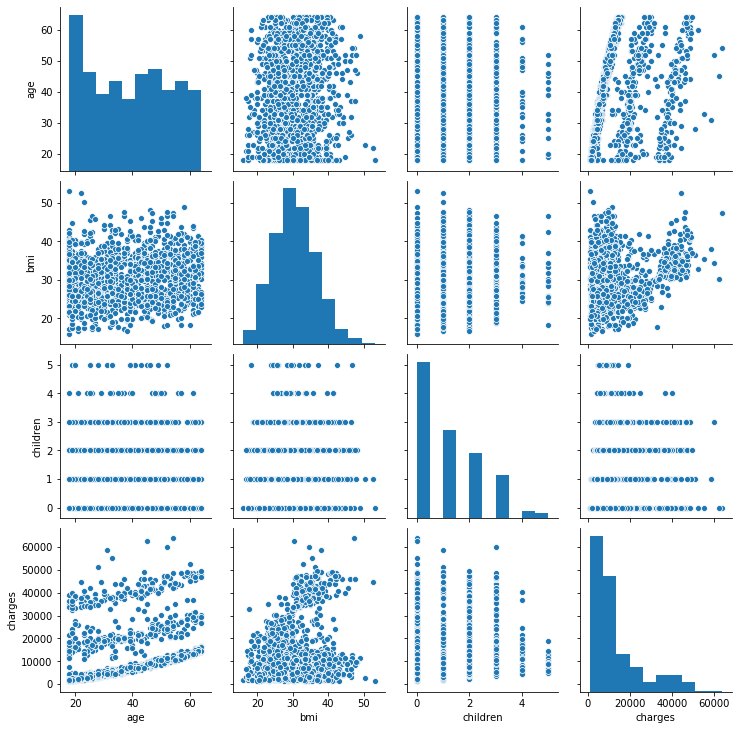

In [20]:
#visualize Data to see what we have
sns.pairplot(Data['age sex bmi children smoker region charges'.split()])

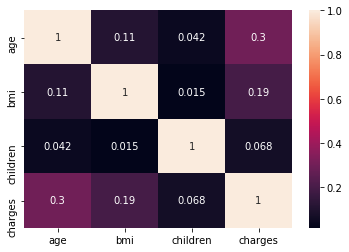

In [29]:
#relationship between different variables
sns.heatmap(Data['age sex bmi children charges'.split()].corr(), annot=True,)

# Handdling Data - Categorical

In [ ]:
# handing categorical data
# import required libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# check the Data-Set
Data.head()

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()


# using Label Encoder for converting sex and smoker columns to numerical
labelencoder = LabelEncoder()
Data['sex'] = labelencoder.fit_transform(Data['sex'])
Data['smoker'] = labelencoder.fit_transform(Data['smoker'])
Data.head()

# using One-Hot Encoding for covnverting region column
ohe = OneHotEncoder()
ohe_Data = pd.DataFrame(ohe.fit_transform(Data[['region']]).toarray())
ohe_Data.columns = 'northeast northwest southeast southwest'.split()

# merge  main Data with Ohe_Data
Data = Data.join(ohe_Data)

# Simple Linear Regression

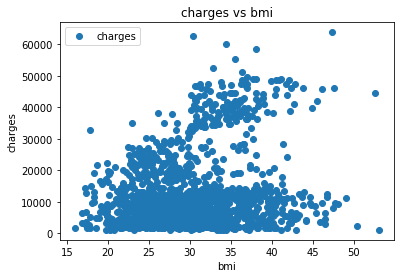

In [50]:
# simple linear Regression
# 1- plot relation btween 2 variables
Data.plot(x='bmi', y='charges', style='o')  
plt.title('charges vs bmi')  
plt.xlabel('bmi')  
plt.ylabel('charges')  
plt.show()

In [51]:
X = Data['bmi'].values.reshape(-1,1)
y = Data['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# standardization scaler - fit&transform on train, fit only on test
#from sklearn.preprocessing import StandardScaler
#s_scaler = StandardScaler()
#X_train = s_scaler.fit_transform(X_train.astype(np.float))
#X_test = s_scaler.transform(X_test.astype(np.float))


# Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2738.25305897]
[[338.94121617]]


In [52]:
#predicting the test set result
y_pred = regressor.predict(X_test)

#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,9724.53000,12974.277787
1,8547.69130,12692.956578
2,45702.02235,16487.403493
3,12950.07120,15746.816936
4,9644.25250,8856.142011
...,...,...
437,19107.77960,12208.270639
438,25656.57526,12011.684733
439,39125.33225,13847.051419
440,3906.12700,11821.877652


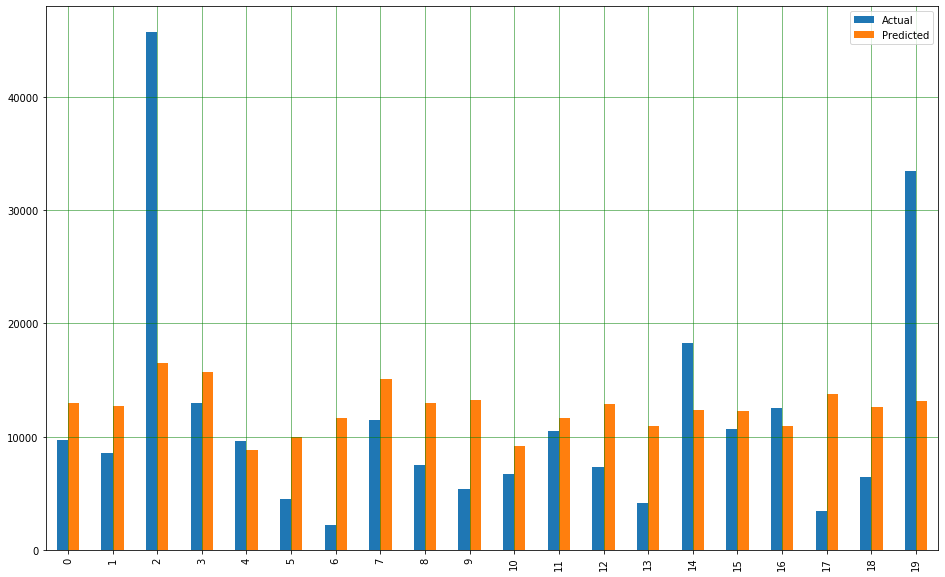

In [53]:
# visualize comparison result as a bar graph
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [34]:
#print('Linear Regression Model:')
#print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
#print("Train Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.08
Train Score 0.10


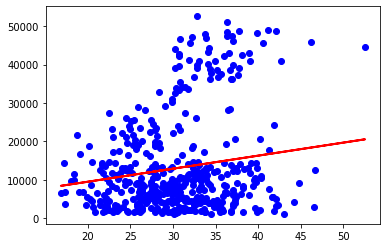

In [54]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [57]:
# evaluation metrics
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 9486.33
Mean Squared Error: 152676833.53
Root Mean Squared Error: 12356.25


In [56]:
Data['charges'].mean()

13270.422265141257

# Multiple Linear Regression

In [71]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import Data
Data = pd.read_csv('DataSet_Kaggle_Insurance.csv')


# check how many values are missing (NaN)
Data.isnull().sum()
#fill the missing values (NaN) by mean of the column
Data['bmi'].fillna(Data['bmi'].mean(), inplace = True)
# double check how many values are missing (NaN) after filling
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
# import required libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# check the Data-Set
Data.head()

# using Label Encoder for converting sex and smoker columns to numerical
labelencoder = LabelEncoder()
Data['sex'] = labelencoder.fit_transform(Data['sex'])
Data['smoker'] = labelencoder.fit_transform(Data['smoker'])
Data.head()

# using One-Hot Encoding for covnverting region column
ohe = OneHotEncoder()
ohe_Data = pd.DataFrame(ohe.fit_transform(Data[['region']]).toarray())
ohe_Data.columns = 'northeast northwest southeast southwest'.split()

# merge  main Data with Ohe_Data
Data = Data.join(ohe_Data)

In [73]:
Data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [74]:
# multiple linear regression
#define X variables and our target(y)
X = Data.drop(['charges', 'region'],axis = 1)
y = Data['charges']

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

13129.0302379189
[ 3.64074973e+03 -1.82789008e+02  1.88423867e+03  7.51901297e+02
  9.32907779e+03 -3.17152977e+17 -3.21851354e+17 -3.34528972e+17
 -3.28681335e+17]


In [75]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,3.640750e+03
sex,-1.827890e+02
bmi,1.884239e+03
children,7.519013e+02
smoker,9.329078e+03
northeast,-3.171530e+17
northwest,-3.218514e+17
southeast,-3.345290e+17
southwest,-3.286813e+17


In [86]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
578,9724.53000,11636.895811
610,8547.69130,9954.209872
569,45702.02235,36994.209872
1034,12950.07120,15106.209872
198,9644.25250,6658.209872
981,4500.33925,3650.209872
31,2198.18985,1346.209872
1256,11436.73815,14146.209872
1219,7537.16390,8898.209872
1320,5425.02335,6978.209872


In [79]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4087.78807675469
Mean Squared Error: 34772218.99841795
Root Mean Squared Error: 5896.7973509709445


In [81]:
Data['charges'].mean()

13270.422265141257

In [85]:

print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Train Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.73
Train Score 0.78


# Polynomial Regression

In [87]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

X = Data.drop(['charges','region'],axis = 1)
y = Data['charges']

#training the simple Linear Regression model on the training set
poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train.astype(np.float))
#X_test= sc.transform(X_test.astype(np.float))


#fit model
poly_lr = LinearRegression()
poly_lr.fit(X_train,y_train)

y_pred = poly_lr.predict(X_test)


print('Polynomial Regression Model:')
print("Train Score {:.2f}".format(poly_lr.score(X_train,y_train)))
print("Test Score {:.2f}".format(poly_lr.score(X_test, y_test)))

Polynomial Regression Model:
Train Score 0.83
Test Score 0.87


In [90]:
y_pred = poly_lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
578,9724.53000,11677.283895
610,8547.69130,10334.453700
569,45702.02235,49718.074021
1034,12950.07120,15083.559038
198,9644.25250,8223.334109
981,4500.33925,4580.300290
31,2198.18985,4582.639957
1256,11436.73815,14607.179596
1219,7537.16390,10136.593522
1320,5425.02335,7916.050736


In [91]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2908.207599857193
Mean Squared Error: 20811936.172743957
Root Mean Squared Error: 4562.010102218534
